## Write Python code to implement a regression model for weather forecasting. Compare simple regression, Ridge regression and Lasso regression

# For the data set I have dowloaded the data set form kaggel 
https://www.kaggle.com/datasets/muthuj7/weather-dataset/data

### Downloaded data (.csv) i have puted in 'Datasets' folder

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error

D:\Programming_software_Install\Anaconda\envs\Deeplearning\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
D:\Programming_software_Install\Anaconda\envs\Deeplearning\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
D:\Programming_software_Install\Anaconda\envs\Deeplearning\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
# Read the data
df = pd.read_csv("./Datasets/weatherHistory.csv")

In [3]:
# Feature selection
x = df[['Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)']]
y = df['Temperature (C)']

In [11]:
# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.01, random_state=42)

In [12]:
# Step 1: Add a column of 1's (Intercept term) to x_train
x_train_with_intercept = pd.concat([pd.Series(1, index=x_train.index, name='Intercept'), x_train], axis=1)

# Step 2: Compute X^T (transpose of x_train_with_intercept)
x_train_transpose = x_train_with_intercept.T

# Step 3: Compute X^T * X (Matrix multiplication)
xtx = np.dot(x_train_transpose.values, x_train_with_intercept.values)

# Step 4: Compute the inverse of (X^T * X)
xtx_inverse = np.linalg.inv(xtx)

# Step 5: Compute (X^T * X)^-1 * X^T (Matrix multiplication)
xtx_inv_xt = np.dot(xtx_inverse, x_train_transpose.values)

# Step 6: Multiply (X^T * X)^-1 * X^T * y_train to get the coefficients (beta)
beta = np.dot(xtx_inv_xt, y_train)

# The resulting beta represents the coefficients (including intercept)
print("Coefficients (beta):")
print(beta)

Coefficients (beta):
[ 2.83954600e+00  8.72519654e-01 -1.42296562e+00  7.96555188e-02
 -4.04343734e-04  8.28525829e-03 -2.02682680e-04]


In [13]:
# Predicted data
x_test_with_intercept = pd.concat([pd.Series(1, index=x_test.index, name='Intercept'), x_test], axis=1)
y_pred = np.dot(x_test_with_intercept, beta)

In [14]:
# Calculate Errors
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")

Mean Squared Error (MSE): 0.85
Root Mean Squared Error (RMSE): 0.92
Mean Absolute Error (MAE): 0.73


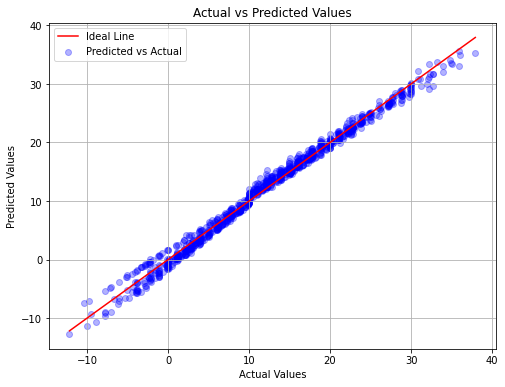

In [15]:
# Plot the graph
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.3, label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Ideal Line')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.legend()
plt.grid(True)
plt.show()

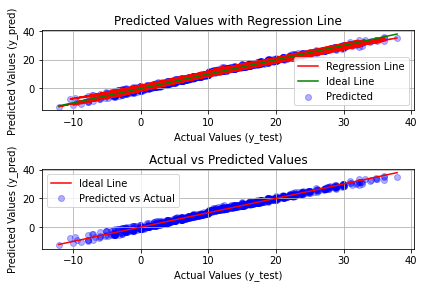

In [25]:
# Subplot 1: Predicted values and regression line
plt.subplot(2, 1, 1)
plt.scatter(y_test, y_pred, color='blue', alpha=0.3, label='Predicted')
plt.plot(y_test, y_pred, color='red', label='Regression Line')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='green', label='Ideal Line')
plt.xlabel("Actual Values (y_test)")
plt.ylabel("Predicted Values (y_pred)")
plt.title("Predicted Values with Regression Line")
plt.legend()
plt.grid(True)

# Subplot 2: Actual vs Predicted (Ideal Line)
plt.subplot(2, 1, 2)
plt.scatter(y_test, y_pred, color='blue', alpha=0.3, label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Ideal Line')
plt.xlabel("Actual Values (y_test)")
plt.ylabel("Predicted Values (y_pred)")
plt.title("Actual vs Predicted Values")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


## Ridge Regression

In [32]:
# Regularization strength for Ridge Regression
lambda_ridge = 1.0  

# Ridge Regression formula:
# β_ridge = (X^T * X + λI)^-1 * X^T * y
# Where:
# X^T = Transpose of x_train_with_intercept
# I = Identity matrix (of size equal to the number of features in x_train_with_intercept)
# λ = Regularization strength
# y = Target values

# Create the identity matrix for regularization
ridge_term = lambda_ridge * np.identity(x_train_with_intercept.shape[1])

# Compute X^T * X
xt_x = np.matmul(x_train_with_intercept.T, x_train_with_intercept)

# Add regularization term (λ * I) to X^T * X
regularized_xt_x = xt_x + ridge_term

# Invert the regularized matrix
inverse_regularized_xt_x = np.linalg.inv(regularized_xt_x)

# Compute X^T * y
xt_y = np.matmul(x_train_with_intercept.T, y_train)

# Compute β_ridge = (X^T * X + λI)^-1 * X^T * y
beta_ridge = np.matmul(inverse_regularized_xt_x, xt_y)

print("Ridge Coefficients:", beta_ridge)

Ridge Coefficients: [ 2.83505987e+00  8.72542328e-01 -1.42090734e+00  7.96772579e-02
 -4.04088491e-04  8.30852464e-03 -2.00515421e-04]


In [33]:
# Predicted data
y_ridge_pred = np.dot(x_test_with_intercept, beta_ridge)

# Calculate Errors
mse = mean_squared_error(y_test, y_ridge_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_ridge_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")

Mean Squared Error (MSE): 0.85
Root Mean Squared Error (RMSE): 0.92
Mean Absolute Error (MAE): 0.73


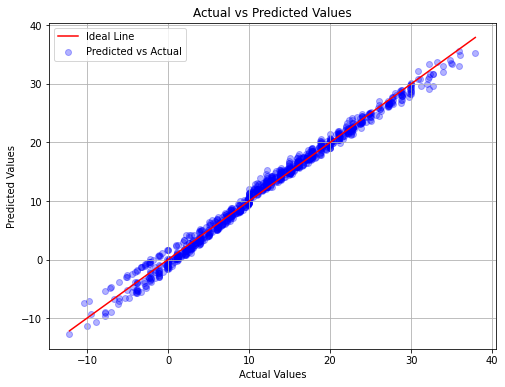

In [34]:
# Plot the graph
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_ridge_pred, color='blue', alpha=0.3, label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Ideal Line')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.legend()
plt.grid(True)
plt.show()

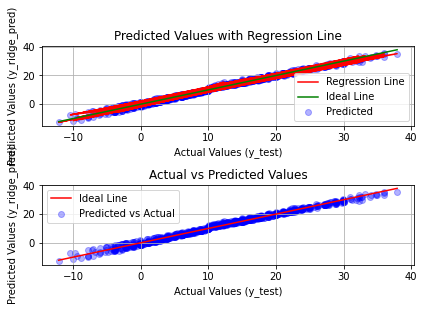

In [35]:
# Subplot 1: Predicted values and regression line
plt.subplot(2, 1, 1)
plt.scatter(y_test, y_ridge_pred, color='blue', alpha=0.3, label='Predicted')
plt.plot(y_test, y_ridge_pred, color='red', label='Regression Line')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='green', label='Ideal Line')
plt.xlabel("Actual Values (y_test)")
plt.ylabel("Predicted Values (y_ridge_pred)")
plt.title("Predicted Values with Regression Line")
plt.legend()
plt.grid(True)

# Subplot 2: Actual vs Predicted (Ideal Line)
plt.subplot(2, 1, 2)
plt.scatter(y_test, y_ridge_pred, color='blue', alpha=0.3, label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Ideal Line')
plt.xlabel("Actual Values (y_test)")
plt.ylabel("Predicted Values (y_ridge_pred)")
plt.title("Actual vs Predicted Values")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

## Losso Regression

In [43]:
# # Define parameters for Lasso Regression
# lambda_lasso = 1.0  # Regularization strength
# max_iter = 1000     # Maximum iterations
# tol = 1e-4          # Convergence tolerance

# # Initialize beta coefficients to zero
# beta_lasso = np.zeros(x_train_with_intercept.shape[1])
# y_train = np.asarray(y_train).ravel()             # Ensure y_train is 1D

# # Lasso Regression formula uses coordinate descent:
# # Minimize (1/2m) * ||y - Xβ||^2_2 + λ * ||β||_1
# # where m = number of samples

# # Coordinate Descent Algorithm
# for iteration in range(max_iter):
#     beta_prev = beta_lasso.copy()  # Store the previous coefficients
    
#     for j in range(len(beta_lasso)):
#         # Calculate the residual without the contribution of beta_j
#         residual = y_train - np.matmul(x_train_with_intercept, beta_lasso) + x_train_with_intercept[:, j] * beta_lasso[j]
        
#         # Compute the gradient part for feature j
#         rho = np.dot(x_train_with_intercept[:, j], residual)
        
#         # Apply soft thresholding for L1 penalty
#         if rho < -lambda_lasso:
#             beta_lasso[j] = (rho + lambda_lasso) / np.sum(x_train_with_intercept[:, j] ** 2)
#         elif rho > lambda_lasso:
#             beta_lasso[j] = (rho - lambda_lasso) / np.sum(x_train_with_intercept[:, j] ** 2)
#         else:
#             beta_lasso[j] = 0.0
    
#     # Check for convergence
#     if np.sum(np.abs(beta_lasso - beta_prev)) < tol:
#         print(f"Lasso converged in {iteration + 1} iterations")
#         break

# print("Lasso Coefficients:", beta_lasso)

In [48]:
# Lasso Regression with 7 Features
lambda_lasso = 0.1  # Regularization strength
alpha = 0.01        # Learning rate
iterations = 1000   # Number of iterations

# Initialize beta coefficients
beta_lasso = np.zeros(x_train_with_intercept.shape[1])  # Shape (7,)

# Gradient Descent Loop
for iteration in range(iterations):
    # Predicted values
    y_losso_pred = np.dot(x_train_with_intercept, beta_lasso)  # Shape (m,)
    
    # Gradient of the loss
    loss_gradient = -np.dot(x_train_with_intercept.T, (y_train - y_losso_pred)) / len(y_train)  # Shape (7,)
    
    # L1 penalty (element-wise sign operation)
    penalty = lambda_lasso * np.sign(beta_lasso)  # Shape (7,)
    
    # Update coefficients
    beta_lasso -= alpha * (loss_gradient + penalty)  # Shape (7,)

# Display final coefficients
print("Final Lasso Coefficients:", beta_lasso)

Final Lasso Coefficients: [nan nan nan nan nan nan nan]


In [49]:
from sklearn.preprocessing import StandardScaler

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train_with_intercept)

# Initialize variables
lambda_lasso = 0.01
alpha = 0.001
iterations = 1000
beta_lasso = np.zeros(X_train_scaled.shape[1])  # Shape (7,)

# Gradient Descent Loop
for iteration in range(iterations):
    y_pred = np.dot(X_train_scaled, beta_lasso)  # Predictions
    loss_gradient = -np.dot(X_train_scaled.T, (y_train - y_pred)) / len(y_train)
    penalty = lambda_lasso * np.sign(beta_lasso)
    beta_lasso -= alpha * (loss_gradient + penalty)  # Update coefficients

print("Final Lasso Coefficients:", beta_lasso)

Final Lasso Coefficients: [ 0.          5.0908094  -2.27586148 -0.13001314  0.08563556  1.1190988
 -0.05891748]


In [50]:
# Predicted data
y_losso_pred = np.dot(x_test_with_intercept, beta_lasso)

# Calculate Errors
mse = mean_squared_error(y_test, y_losso_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_losso_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")

Mean Squared Error (MSE): 2525.91
Root Mean Squared Error (RMSE): 50.26
Mean Absolute Error (MAE): 42.32


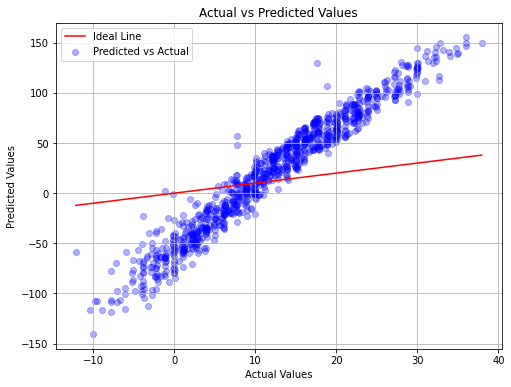

In [51]:
# Plot the graph
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_losso_pred, color='blue', alpha=0.3, label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Ideal Line')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.legend()
plt.grid(True)
plt.show()

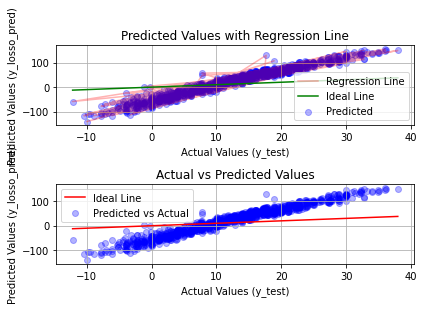

In [53]:
# Subplot 1: Predicted values and regression line
plt.subplot(2, 1, 1)
plt.scatter(y_test, y_losso_pred, color='blue', alpha=0.3, label='Predicted')
plt.plot(y_test, y_losso_pred, color='red', alpha=0.3, label='Regression Line')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='green', label='Ideal Line')
plt.xlabel("Actual Values (y_test)")
plt.ylabel("Predicted Values (y_losso_pred)")
plt.title("Predicted Values with Regression Line")
plt.legend()
plt.grid(True)

# Subplot 2: Actual vs Predicted (Ideal Line)
plt.subplot(2, 1, 2)
plt.scatter(y_test, y_losso_pred, color='blue', alpha=0.3, label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Ideal Line')
plt.xlabel("Actual Values (y_test)")
plt.ylabel("Predicted Values (y_losso_pred)")
plt.title("Actual vs Predicted Values")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()